In [ ]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

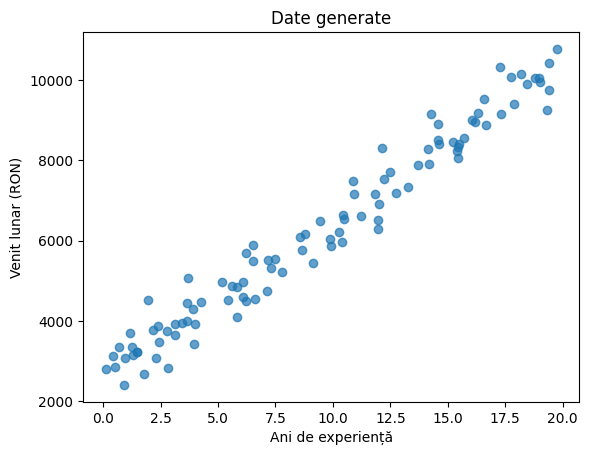

In [ ]:
np.random.seed(42)

# generare X values
obs = 100
x = np.random.uniform(0, 20, obs) # 100 valori pentru anii de experienta intre 0 si 20
true_intercept = 2500  # Intercept real
true_slope = 400      # Creșterea salariului pe an de experiență
noise = np.random.normal(0, 500, obs)  # Zgomot

# venitul lunar (y)
y = true_intercept + true_slope * x + noise

# Vizualizăm datele
plt.scatter(x, y, alpha=0.7)
plt.xlabel("Ani de experiență")
plt.ylabel("Venit lunar (RON)")
plt.title("Date generate")
plt.show()

In [ ]:
import pymc as pm
import arviz as az

Output()

Output()

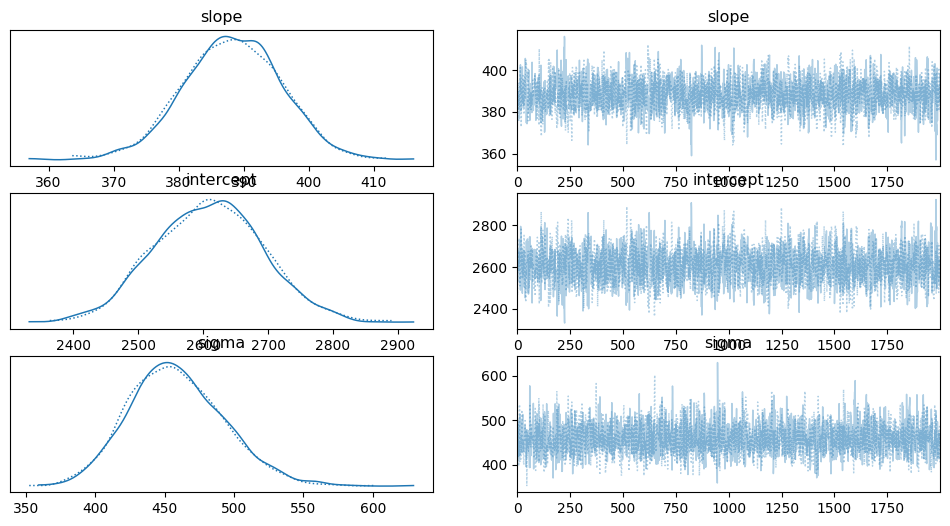

               mean      sd    hdi_3%   hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
slope       388.302   7.545   374.924   402.654      0.180    0.127    1774.0   
intercept  2609.118  83.853  2448.427  2760.489      2.022    1.431    1718.0   
sigma       458.774  34.146   395.592   522.300      0.701    0.498    2387.0   

           ess_tail  r_hat  
slope        1652.0    1.0  
intercept    1843.0    1.0  
sigma        1944.0    1.0  


In [ ]:
with pm.Model() as model:
    # Priori pentru panta si intercept
    slope = pm.Normal("slope", mu=0, sigma=500)
    intercept = pm.Normal("intercept", mu=2000, sigma=1000)
    sigma = pm.HalfNormal("sigma", sigma=1000)

    # Regresia liniara
    mu = intercept + slope * x

    # Observatii
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)

    # Posteriorii
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Rezultate
az.plot_trace(trace, var_names=["slope", "intercept", "sigma"])
plt.show()

# Statistici sumarizate
print(az.summary(trace, var_names=["slope", "intercept", "sigma"]))